In [49]:
import pandas as pd
import numpy as np
from scipy import *
import pingouin as pg
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm

In [79]:
dm = pd.read_csv('/home/jan/Documents/01_doktorarbeit_1/Daten/alpha-Amylase/amylase_musik.csv', header = 0, usecols = [0])
dm.loc[:,('Amylase_in_U_l')].astype(float)
#dw.loc[:,('Zeit')].astype(float)
dm = dm.dropna()

dw = pd.read_csv('/home/jan/Documents/01_doktorarbeit_1/Daten/alpha-Amylase/amylase_sound.csv', header = 0, usecols = [0])
dw.loc[:,('Amylase_in_U_l')].astype(float)
dw = dw.dropna()

dwm = pd.read_csv('/home/jan/Documents/01_doktorarbeit_1/Daten/alpha-Amylase/amylase_musik_sound.csv', header = 0, usecols = [0])
dwm.loc[:,('Amylase_in_U_l')].astype(float)
dwm = dwm.dropna()

#Transformation mittels Quadratwurzel der Soundgruppe
sqrt_dwm = np.sqrt(dwm['Amylase_in_U_l'])

#Transformation mittels Quadratwurzel der Soundgruppe
sqrt_dw = np.sqrt(dw['Amylase_in_U_l'])

#Transformation mittels Quadratwurzel der Musikgruppe
sqrt_dm = np.sqrt(dm['Amylase_in_U_l'])

In [66]:
#Mittelwert in der Musik+Sound Gruppe über alle 6 Messungen
mean_m_s = dwm.mean(axis = None, skipna=None, level=None, numeric_only=None)

#Mittelwert in der sound Gruppe über alle 6 Messungen
mean_sound = dw.mean(axis = None, skipna=None, level=None, numeric_only=None)

#Mittelwert in der Musik Gruppe über alle 6 Messungen
mean_music = dm.mean(axis = None, skipna=None, level=None, numeric_only=None)


#Standartabwichung in der Musik+Sound Gruppe über alle 6 Messungen
std_m_s = dwm.std(axis=None, skipna=None, level=None, ddof=1, numeric_only=None)

#Standartabwichung in der Musik Gruppe über alle 6 Messungen
std_music = dm.std(axis=None, skipna=None, level=None, ddof=1, numeric_only=None)

#Standartabwichung in der Musik Gruppe über alle 6 Messungen
std_sound = dw.std(axis=None, skipna=None, level=None, ddof=1, numeric_only=None)

In [80]:
#Log Mittelwert in der Musik+Sound Gruppe über alle 6 Messungen
mean_m_s_sqrt = sqrt_dwm.mean(axis = None, skipna=None, level=None, numeric_only=None)

#Log Mittelwert in der Sound Gruppe über alle 6 Messungen
mean_sound_sqrt = sqrt_dw.mean(axis = None, skipna=None, level=None, numeric_only=None)

#Mittelwert in der Musik Gruppe über alle 6 Messungen
mean_music_sqrt = sqrt_dm.mean(axis = None, skipna=None, level=None, numeric_only=None)

#Log_Standartabwichung in der Musik+Sound Gruppe über alle 6 Messungen
std_m_s_sqrt = sqrt_dwm.std(axis=None, skipna=None, level=None, ddof=1, numeric_only=None)

#Log_Standartabwichung in der Sound Gruppe über alle 6 Messungen
std_sound_sqrt = sqrt_dw.std(axis=None, skipna=None, level=None, ddof=1, numeric_only=None)

#Log_Standartabwichung in der Musik Gruppe über alle 6 Messungen
std_music_sqrt = sqrt_dm.std(axis=None, skipna=None, level=None, ddof=1, numeric_only=None)

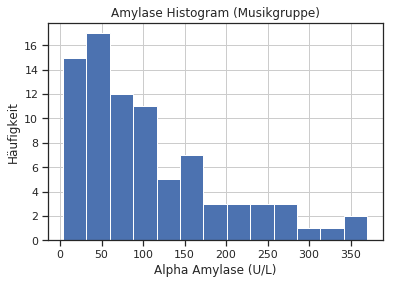

In [81]:
bins = 13
dm.hist(column='Amylase_in_U_l', color = 'b', bins = bins)
plt.title("Amylase Histogram (Musikgruppe)")
plt.xlabel("Alpha Amylase (U/L)")
plt.ylabel("Häufigkeit")
plt.savefig('amylase_musik')

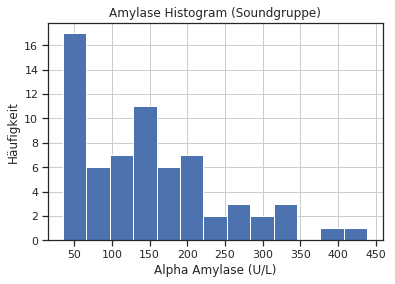

In [82]:
bins = 13
dw.hist(column='Amylase_in_U_l', color = 'b', bins = bins)
plt.title("Amylase Histogram (Soundgruppe)")
plt.xlabel("Alpha Amylase (U/L)")
plt.ylabel("Häufigkeit")
plt.savefig('amylase_sound')

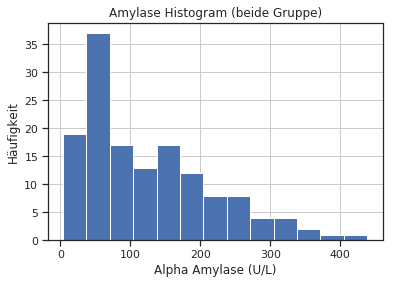

In [83]:
bins = 13
dwm.hist(column='Amylase_in_U_l', color = 'b', bins = bins)
plt.title("Amylase Histogram (beide Gruppe)")
plt.xlabel("Alpha Amylase (U/L)")
plt.ylabel("Häufigkeit")
plt.savefig('amylase_musik+sound')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


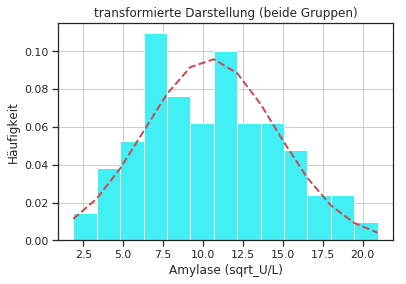

In [88]:
bins_m = 13
(mean_m_s_sqrt, std_m_s_sqrt) = norm.fit(sqrt_dwm)
_, bins, _ = plt.hist(sqrt_dwm, normed = 1, color = '#42eff5', bins = bins_m)
plt.title("transformierte Darstellung (beide Gruppen)")
plt.xlabel("Amylase (sqrt_U/L)")
plt.ylabel("Häufigkeit")
plt.grid(True)
gauss = mlab.normpdf(bins, mean_m_s_sqrt, std_m_s_sqrt)
plt.plot(bins, gauss, 'r--', linewidth=2)
plt.savefig('amylase_m_s_log')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


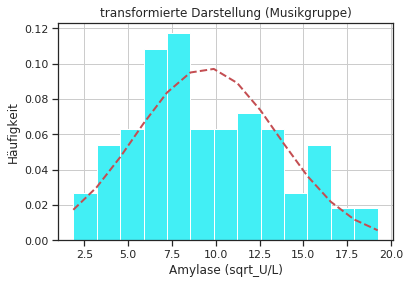

In [89]:
bins_m = 13
(mean_music_sqrt, std_music_sqrt) = norm.fit(sqrt_dm)
_, bins, _ = plt.hist(sqrt_dm, normed = 1, color = '#42eff5', bins = bins_m)
plt.title("transformierte Darstellung (Musikgruppe)")
plt.xlabel("Amylase (sqrt_U/L)")
plt.ylabel("Häufigkeit")
plt.grid(True)
gauss = mlab.normpdf(bins, mean_music_sqrt, std_music_sqrt)
plt.plot(bins, gauss, 'r--', linewidth=2)
plt.savefig('amylase_musik_sqrt')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


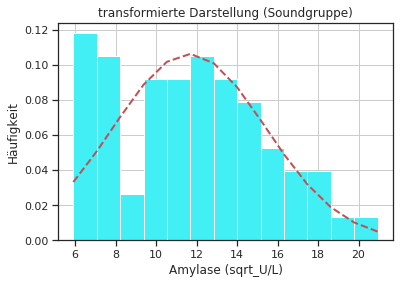

In [90]:
bins_m = 13
(mean_sound_sqrt, std_sound_sqrt) = norm.fit(sqrt_dw)
_, bins, _ = plt.hist(sqrt_dw, normed = 1, color = '#42eff5', bins = bins_m)
plt.title("transformierte Darstellung (Soundgruppe)")
plt.xlabel("Amylase (sqrt_U/L)")
plt.ylabel("Häufigkeit")
plt.grid(True)
gauss = mlab.normpdf(bins, mean_sound_sqrt, std_sound_sqrt)
plt.plot(bins, gauss, 'r--', linewidth=2)
plt.savefig('amylase_sound_sqrt')

In [74]:
#Test auf Normalverteilung der Daten in der Sound Gruppe
import pingouin as pg 
pg.normality(dw)

(False, 0.0)

In [75]:
#Test auf Normalverteilung der Daten in der Musik Gruppe
import pingouin as pg 
pg.normality(dm)

(False, 0.0)

In [91]:
#Test auf Normalverteilung der Daten in der Sound Gruppe (log Daten)
import pingouin as pg 
pg.normality(sqrt_dw)

(True, 0.079)

In [92]:
#Test auf Normalverteilung der Daten in der Musik Gruppe (log Daten)
import pingouin as pg 
pg.normality(sqrt_dm)

(True, 0.07)

In [93]:
#Test auf Normalverteilung der Daten in der Musik Gruppe (log Daten)
import pingouin as pg 
pg.normality(sqrt_dwm)

(False, 0.048)

In [94]:
mean_m_sqrt = (11.9823,9.1083,9.4872,7.7649,8.4290,12.4037)
mean_w_sqrt = (12.6678,11.0345,12.5132,9.7626,10.7429,13.1427)
stda_music_sqrt = (4.37423,3.79345,4.51446,2.72958,3.37449,3.76274)
stda_sound_sqrt = (3.95826,4.19849,4.45755,2.33022,3.48796,3.56508)

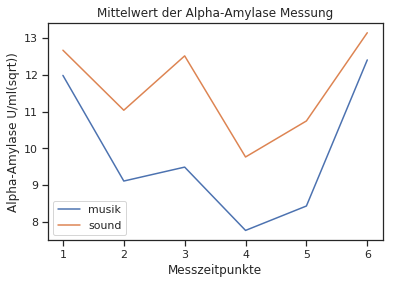

In [96]:
#plot zwei Gruppen 
x_achse = [1,2,3,4,5,6]
get_ipython().magic(u'matplotlib inline')
fig, ax = plt.subplots()
ax.plot(x_achse, mean_m_sqrt, label='musik')
ax.plot(x_achse, mean_w_sqrt, label='sound')
plt.xlabel('Messzeitpunkte')
plt.ylabel('Alpha-Amylase U/ml(sqrt))')
plt.title("Mittelwert der Alpha-Amylase Messung")
plt.legend()
plt.savefig('Mittelwerte der Alpha-Amylase')

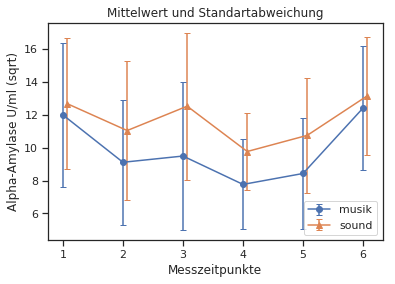

In [97]:
x_achse = [1,2,3,4,5,6]
x1_achse = [1.07,2.07,3.07,4.07,5.07,6.07]
fig, ax = plt.subplots()
ax.errorbar(x_achse, mean_m_sqrt, yerr=stda_music_sqrt, fmt='-o', capsize=3, label='musik')
ax.errorbar(x1_achse, mean_w_sqrt, yerr=stda_sound_sqrt, fmt='-^', capsize=3, label= 'sound')
plt.xlabel('Messzeitpunkte')
plt.ylabel('Alpha-Amylase U/ml (sqrt)')
ax.set_title('Mittelwert und Standartabweichung')
plt.legend()
plt.savefig("a-amylase_mean_stda_baseline.png")